# BACCHANAL BUFFET RESTAURANT

In this section I will prepare a ppt for a restaurant. I will try to increase their customer satisfaction and customer sentiments.

<img src='https://resizer.otstatic.com/v2/photos/wide-huge/2/62952418.jpg'>
<br>

In [2]:
import pandas as pd
import seaborn as sns
import nltk
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
pr = PorterStemmer()
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

[nltk_data] Downloading package stopwords to C:\Users\Ramazan &
[nltk_data]     Selma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ramazan &
[nltk_data]     Selma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df=pd.read_csv("restaurant.csv")

In [6]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [7]:
df.tail()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51
10416,3220316,mMa_YQNBJfuh_Nw_x81jlw,GsALS1y9wJoBRJTEzJiISg,RESDUcs7fIiihp38-d6_6g,4,1,1,1,I got a chance to go to the Bacchanal Buffett ...,2019-11-30 22:36:56


In [8]:
df.shape

(10417, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [10]:
df.describe()

,Unnamed: 0,stars,useful,funny,cool
count,1.041700e+04,10417.000000,10417.000000,10417.000000,10417.000000
mean,2.775377e+06,3.777671,1.419603,0.640875,0.759720
std,2.428654e+05,1.331451,4.875888,3.347964,4.125847
min,2.370338e+06,1.000000,0.000000,0.000000,0.000000
25%,2.566392e+06,3.000000,0.000000,0.000000,0.000000
50%,2.762536e+06,4.000000,0.000000,0.000000,0.000000
75%,2.975480e+06,5.000000,1.000000,0.000000,0.000000
max,3.220316e+06,5.000000,176.000000,159.000000,172.000000


In [11]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [12]:
df.sample(2)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
8102,3004868,ZcxYqYLJE7gLMhS4zlDxJA,_GZgL6AEU-pxNolQkCpY9w,RESDUcs7fIiihp38-d6_6g,4,0,0,0,It is expensive (especially during the holiday...,2018-12-23 02:40:27
3386,2626027,pM_EJY2BFVuQMO73V1QRPQ,XD_JGWx8yjntSOw-yDyr3g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I don't frequent buffets but came here with so...,2017-11-13 15:28:00


### Dropping unnecessary columns

In [13]:
df.drop(columns=["Unnamed: 0", "review_id", "business_id","user_id"], inplace=True)

In [14]:
df.drop(columns=["funny", "cool","useful"], inplace=True) # aklımda bişey var

In [15]:
df.head()

,stars,text,date
0,5,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,4,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,1,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,5,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


### Converting date column to useful columns

In [16]:
#create 3 columns that year and month and day and hour from date column and drop date column

df["year"] = pd.to_datetime(df["date"]).dt.year
df["month"] = pd.to_datetime(df["date"]).dt.month
df["day"] = pd.to_datetime(df["date"]).dt.day
df["hour"] = pd.to_datetime(df["date"]).dt.hour
df['day_of_week'] = pd.to_datetime(df["date"]).dt.day_of_week

# Drop date column
df.drop(columns=["date"], inplace=True)

In [17]:
df.head()

,stars,text,year,month,day,hour,day_of_week
0,5,After getting food poisoning at the Palms hote...,2012,12,4,3,1
1,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014,1,17,0,4
2,4,The crab legs are better than the ones at Wick...,2015,6,8,18,0
3,1,Not worth it! Too salty food and expensive! Th...,2016,12,19,16,0
4,5,I would give this infinite stars if I could. M...,2015,7,28,7,1


## EDA - Exploratory Data Analysis 

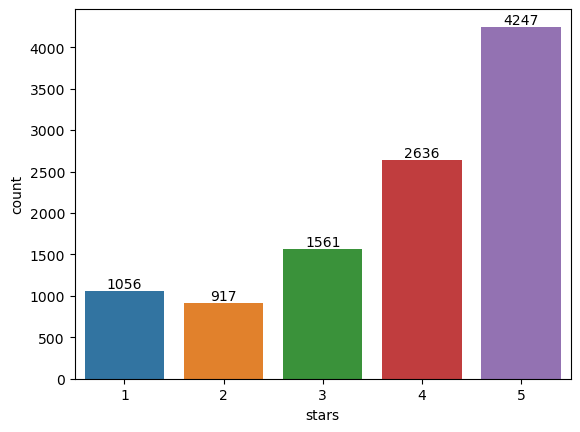

In [18]:
ax=sns.countplot(x=df['stars'])
ax.bar_label(ax.containers[0]); 

In [19]:
df.sample(2)

,stars,text,year,month,day,hour,day_of_week
6749,4,The reason I'm giving this 4stars was only bec...,2016,6,19,23,6
8487,4,Rereading my review and I think my stars didn'...,2019,5,29,23,2


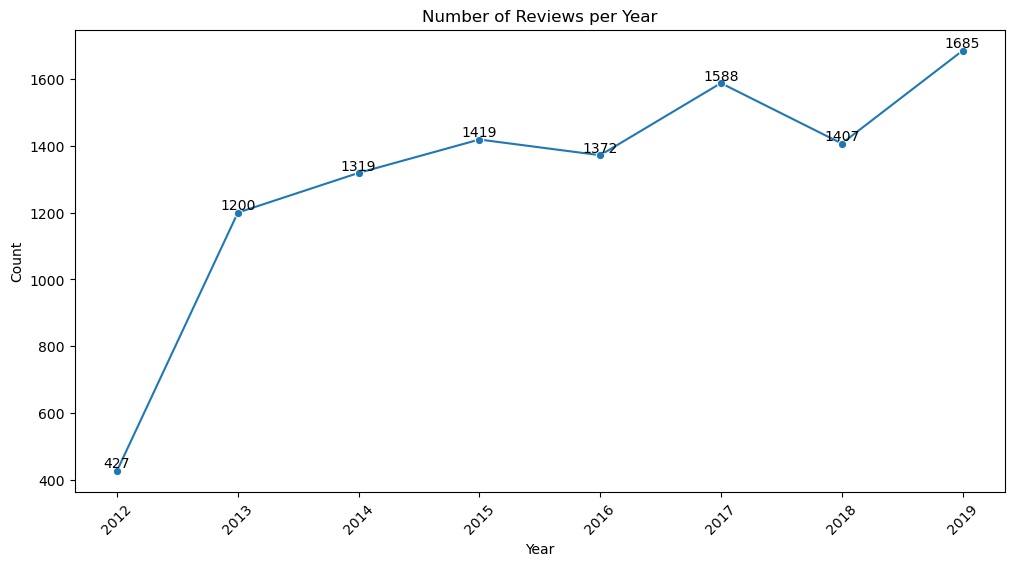

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Yıllara göre veri sayısını hesaplama
yearly_counts = df['year'].value_counts().sort_index()

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')

# Her noktanın üzerine sayıları ekleme
for x, y in zip(yearly_counts.index, yearly_counts.values):
    ax.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Reviews per Year')
plt.xticks(rotation=45)  # X eksenindeki yılların daha iyi görünmesi için
plt.show()

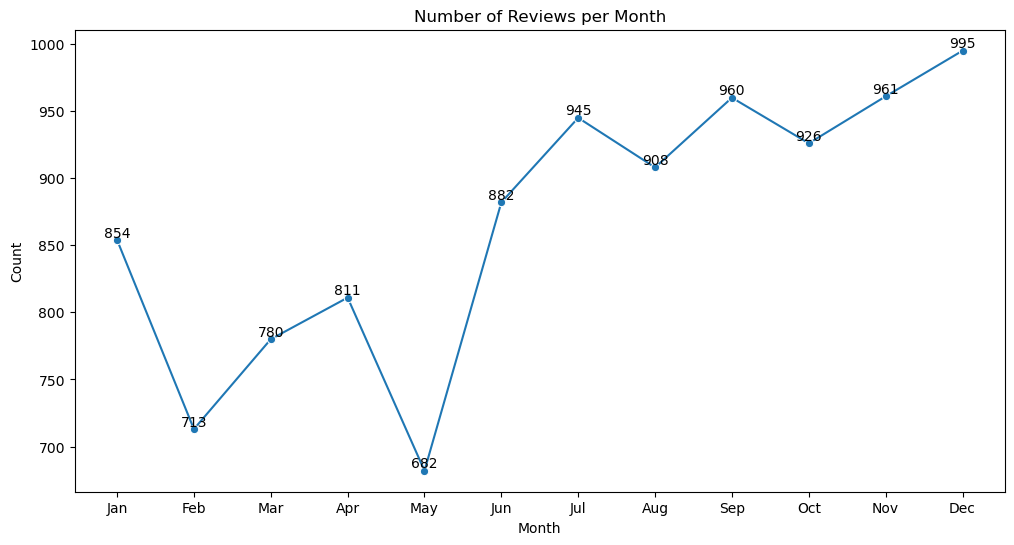

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aylara göre veri sayısını hesaplama
monthly_counts = df['month'].value_counts().sort_index()

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')

# Her noktanın üzerine sayıları ekleme
for x, y in zip(monthly_counts.index, monthly_counts.values):
    ax.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Reviews per Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

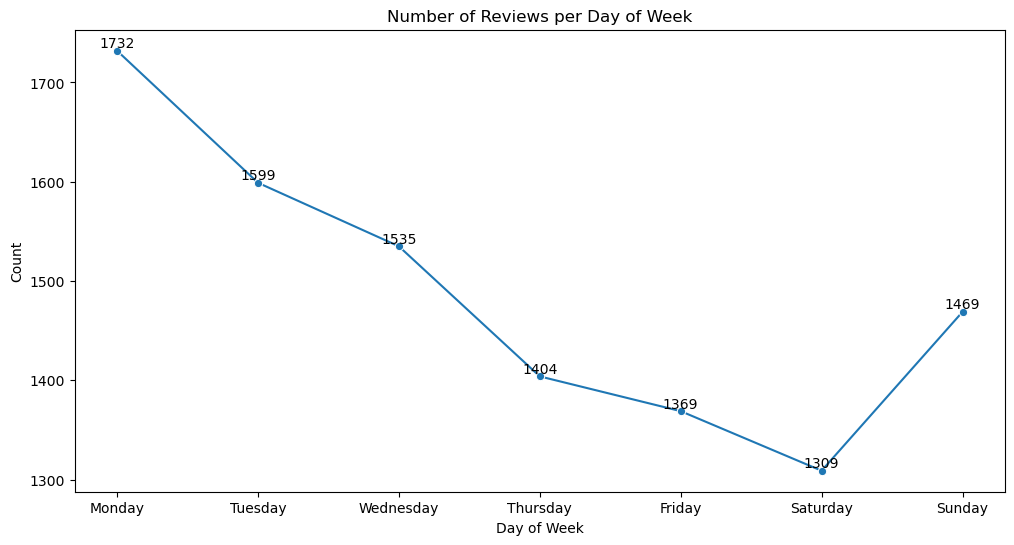

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Haftanın günlerine göre veri sayısını hesaplama
day_of_week_counts = df['day_of_week'].value_counts().sort_index()

# Gün adlarını belirleme
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=day_of_week_counts.index, y=day_of_week_counts.values, marker='o')

# Her noktanın üzerine sayıları ekleme
for x, y in zip(day_of_week_counts.index, day_of_week_counts.values):
    ax.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Number of Reviews per Day of Week')
plt.xticks(ticks=range(7), labels=days)
plt.show()

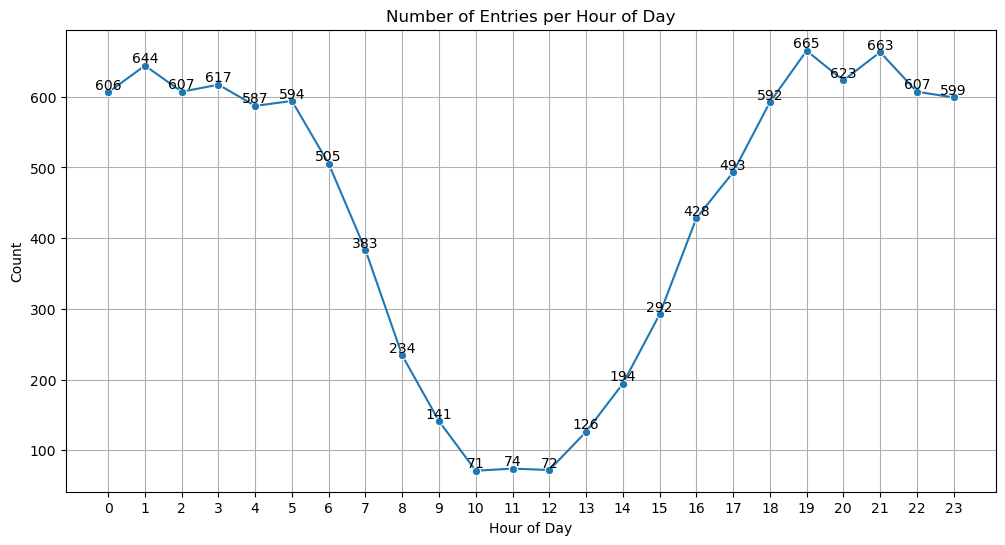

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Saatlerin sayısını hesaplama
hour_counts = df['hour'].value_counts().sort_index()

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o')

# Her noktanın üzerine sayıları ekleme
for x, y in zip(hour_counts.index, hour_counts.values):
    ax.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Number of Entries per Hour of Day')
plt.xticks(ticks=range(24))  # Saatleri 0'dan 23'e kadar göster
plt.grid(True)  # Grafik üzerinde ızgara eklemek için
plt.show()

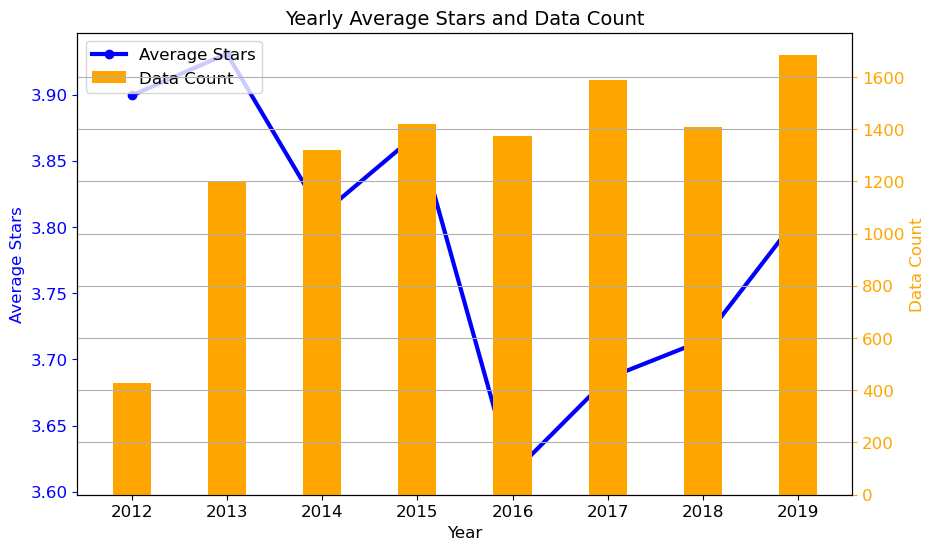

In [24]:

# Convert the 'year' column to numeric
df['year'] = df['year'].astype(int)

# Calculate the average 'stars' value for each year
avg_stars = df.groupby('year')['stars'].mean()

# Calculate the count of data for each year
data_count = df.groupby('year')['stars'].count()

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average stars line graph
ax1.plot(avg_stars.index, avg_stars, color='blue', marker='o', linewidth=3, label='Average Stars')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Stars', color='blue', fontsize=12)
ax1.tick_params('y', colors='blue', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Plot the data count bar graph
ax2 = ax1.twinx()
ax2.bar(data_count.index, data_count, color='orange', width=0.4, label='Data Count')
ax2.set_ylabel('Data Count', color='orange', fontsize=12)
ax2.tick_params('y', colors='orange', labelsize=12)

# Set the legend and grid
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)
plt.grid(True)

# Set the title
plt.title('Yearly Average Stars and Data Count', fontsize=14)
plt.show()

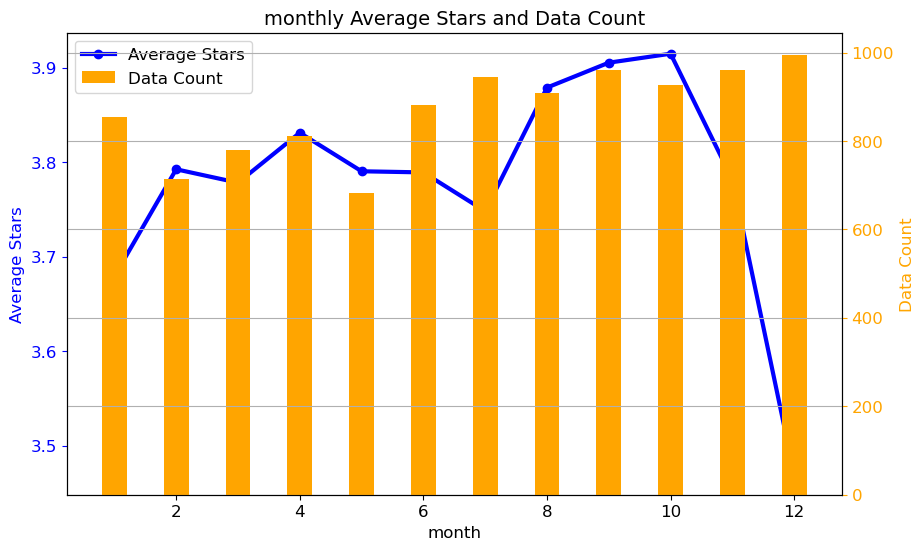

In [25]:
# Convert the 'month' column to numeric
df['month'] = df['month'].astype(int)

# Calculate the average 'stars' value for each month
avg_stars = df.groupby('month')['stars'].mean()

# Calculate the count of data for each month
data_count = df.groupby('month')['stars'].count()

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average stars line graph
ax1.plot(avg_stars.index, avg_stars, color='blue', marker='o', linewidth=3, label='Average Stars')
ax1.set_xlabel('month', fontsize=12)
ax1.set_ylabel('Average Stars', color='blue', fontsize=12)
ax1.tick_params('y', colors='blue', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Plot the data count bar graph
ax2 = ax1.twinx()
ax2.bar(data_count.index, data_count, color='orange', width=0.4, label='Data Count')
ax2.set_ylabel('Data Count', color='orange', fontsize=12)
ax2.tick_params('y', colors='orange', labelsize=12)

# Set the legend and grid
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)
plt.grid(True)

# Set the title
plt.title('monthly Average Stars and Data Count', fontsize=14)
plt.show()

### Sentiment analysis

In [26]:
# sentiment column, for stars in (1,2) = negative, for stars in (4,5) = positive and for stars = 3 = neutral

df['sentiment'] = df['stars'].apply(lambda x: 'negative' if x < 3 else 'positive' if x > 3 else 'neutral')

df.sample(2)

,stars,text,year,month,day,hour,day_of_week,sentiment
7471,5,The best buffet ever. Only 49 bucks a person f...,2016,1,13,21,2,positive
6518,3,11:00am arrival \n11:15am sit down \n\nHoliday...,2019,1,15,6,1,neutral


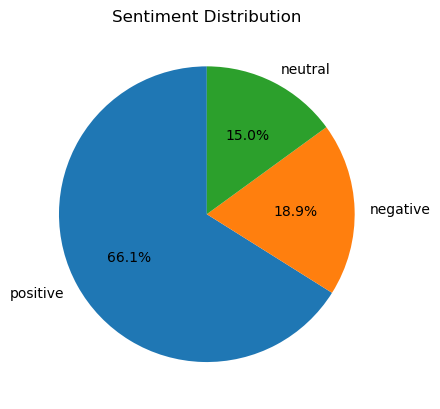

In [27]:
sentiment_counts = df['sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

### Wordclouding

In [28]:
def wc(data,bgcolor):
    plt.figure(figsize = (10,10))
    mask = np.array(Image.open("heart.png"))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS,mask =mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

In [29]:
df.sample(2)

,stars,text,year,month,day,hour,day_of_week,sentiment
3489,4,There are a lot of people waiting at dinner ti...,2017,8,12,17,5,positive
8915,2,"Over price, went here twice, first time was ju...",2019,5,24,15,4,negative


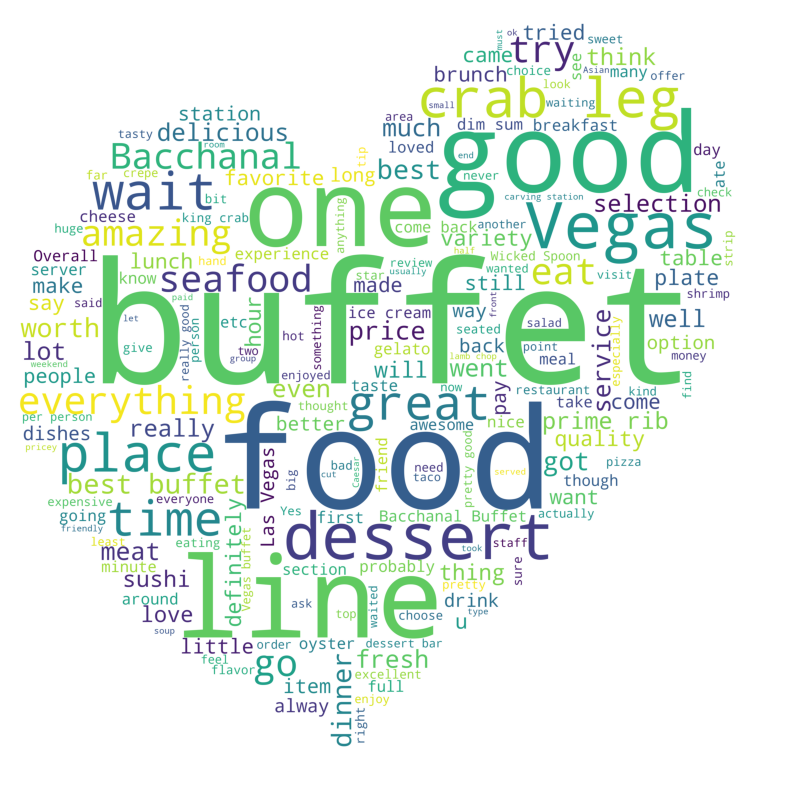

In [30]:
wc(df[df['sentiment'] == 'positive']['text'], "white")

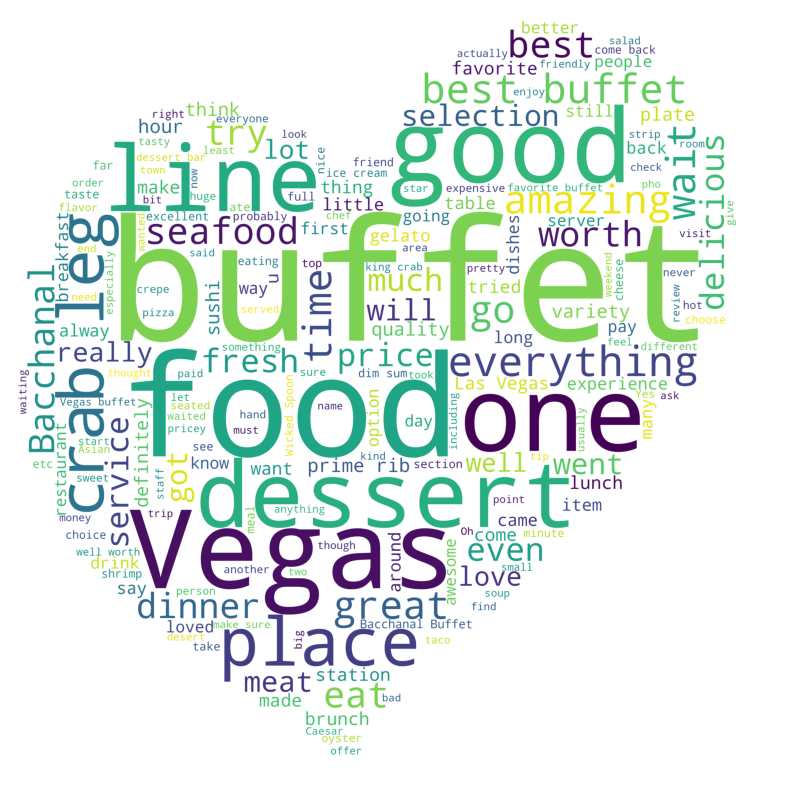

In [31]:
wc(df[df['stars'] == 5]['text'], "white")

In [32]:
def wc2(data,bgcolor):
    plt.figure(figsize = (10,10))
    mask = np.array(Image.open("notok.jpeg"))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS,mask =mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

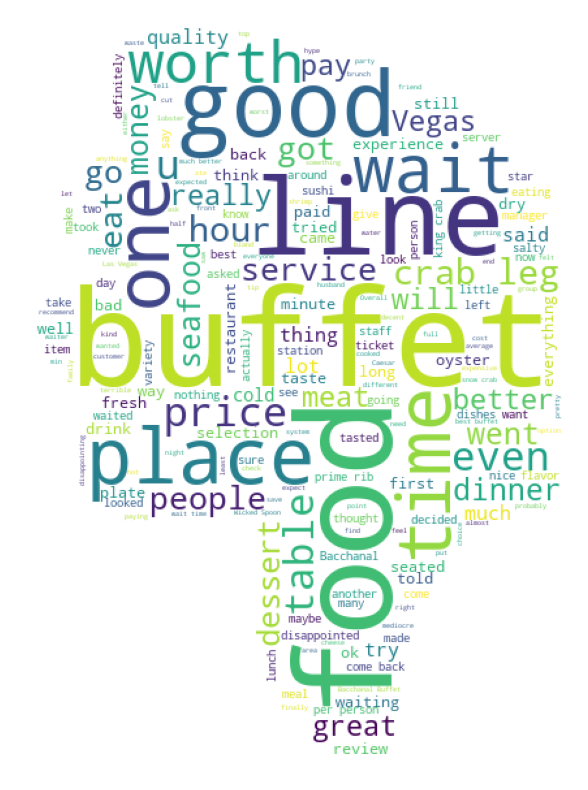

In [33]:
wc2(df[df['sentiment'] == 'negative']['text'], "white")

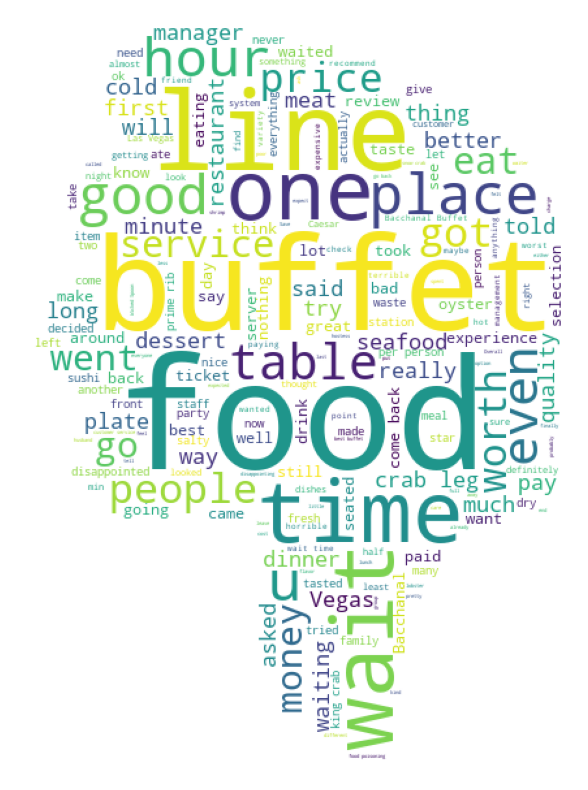

In [34]:
wc2(df[df['stars'] == 1]['text'], "white")

### Text Processing

When starting an NLP project:<br>
1- convert each letter to lowercase<br>
2- punctuation marks left<br>
3- remove digits<br>
4- remove line breaks<br>
5- remove unnecessary words - stopwords<br>
6- tokenize<br>
7- Remove suffixes and find roots with lemma and stemm<br>
8- vectorize<br>

In [179]:
#first four steps of text processing
df['text']=df['text'].str.lower() #küçük harfe çevir
df['text']=df['text'].str.replace('[^\w\s]', ' ',regex=True) #noktalama işaretlerini kaldırır
df['text']=df['text'].str.replace('\n', ' ',regex=True) #satır sonlarını kaldırır
df['text']=df['text'].str.replace('\d+', ' ',regex=True) #rakamları kaldırır
df['text']=df['text'].str.replace('\r', ' ',regex=True) #satır başlarını baldırır

In [180]:
df['language'] = df['text'].apply(lambda x: detect(x))

In [181]:
df.language.value_counts()

language
en       10375
es          10
ko           7
ja           7
zh-cn        6
de           4
fr           4
da           2
pt           1
sk           1
Name: count, dtype: int64

In [182]:
#filter only en language 

df = df[df['language'] == 'en']
df.language.value_counts()

language
en    10375
Name: count, dtype: int64

In [188]:
df.sample(5)

,stars,text,year,month,day,hour,day_of_week,sentiment,language
6272,5,after weeks and weeks of reading yelp reviews ...,2013,8,28,14,2,positive,en
4558,3,i went to this buffet to scope it out for a pa...,2012,11,18,12,6,neutral,en
4741,5,great food will definitely come back when in ...,2017,7,12,2,2,positive,en
4559,4,we went of a sunday at around pm and the l...,2016,2,29,18,0,positive,en
46,4,wouldve given stars if it werent so pricey ...,2012,11,6,14,1,positive,en


In [203]:

stop_words = set(stopwords.words('english'))

def lemmafn(text):
    words = text.split()
    stemmed_words = [pr.stem(word) for word in words if word not in stop_words]
    return ' '.join(stemmed_words)


df['stemmed_text'] = df['text'].apply(lemmafn)

In [204]:
def find_best_model(x, y):
    # Eğitim ve test setlerine ayırma
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Algoritmalar
    algorithms = {
        'Logistic Regression': LogisticRegression(),
        'K-Neighbors Classifier': KNeighborsClassifier(),
        'Decision Tree Classifier': DecisionTreeClassifier(),
        'Random Forest Classifier': RandomForestClassifier(),
        'AdaBoost Classifier': AdaBoostClassifier(),
        'Gradient Boosting Classifier': GradientBoostingClassifier(),
        'Multinomial NB': MultinomialNB(),
        'Bernoulli NB': BernoulliNB()
    }
    
    best_model = None
    best_accuracy = 0
    best_model_name = ""
    best_model_metrics = {}
    
    # Her bir algoritma için eğitim ve değerlendirme
    for name, model in algorithms.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        accuracy = accuracy_score(y_pred,y_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_pred,y_test)
        class_report = classification_report(y_pred,y_test)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_model_name = name
            best_model_metrics = {
                'accuracy': accuracy,
                'f1_score': f1,
                'confusion_matrix': conf_matrix,
                'classification_report': class_report
            }
    
    return best_model_name, best_model_metrics

### Combinations of methods

In [ ]:
# 1st method: CountVectorizer with unigram
# 2nd method: CountVectorizer with unigram and lemmafn
# 3rd method: CountVectorizer with bigram
# 4th method: CountVectorizer with bigram and lemmafn
# 5th method: TfidVectorizer with unigram
# 6th method: TfidVectorizer with unigram and lemmafn
# 7th method: TfidVectorizer with bigram
# 8th method: TfidVectorizer with bigram and lemmafn

In [218]:
x = df['text']
xs = df['stemmed_text']
y = df['sentiment']

vect = CountVectorizer()
x = vect.fit_transform(x)
xs = vect.fit_transform(xs)


In [220]:
# 1st method: CountVectorizer with unigram
find_best_model(x, y)

('Logistic Regression',
 {'accuracy': 0.8072289156626506,
  'f1_score': 0.8004543680700585,
  'confusion_matrix': array([[ 298,   86,   30],
         [  74,  128,   60],
         [  43,  107, 1249]], dtype=int64),
  'classification_report': '              precision    recall  f1-score   support\n\n    negative       0.72      0.72      0.72       414\n     neutral       0.40      0.49      0.44       262\n    positive       0.93      0.89      0.91      1399\n\n    accuracy                           0.81      2075\n   macro avg       0.68      0.70      0.69      2075\nweighted avg       0.82      0.81      0.81      2075\n'})

In [219]:
# 2nd method: CountVectorizer with unigram and lemmafn
find_best_model(xs, y)

('Logistic Regression',
 {'accuracy': 0.7850602409638554,
  'f1_score': 0.7764937243114267,
  'confusion_matrix': array([[ 278,   81,   29],
         [  82,  111,   70],
         [  55,  129, 1240]], dtype=int64),
  'classification_report': '              precision    recall  f1-score   support\n\n    negative       0.67      0.72      0.69       388\n     neutral       0.35      0.42      0.38       263\n    positive       0.93      0.87      0.90      1424\n\n    accuracy                           0.79      2075\n   macro avg       0.65      0.67      0.66      2075\nweighted avg       0.80      0.79      0.79      2075\n'})

In [229]:
x = df['text']
xs = df['stemmed_text']
y = df['sentiment']

vect = CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000) # without max_features it longs too much 
x = vect.fit_transform(x)
xs = vect.fit_transform(xs)

In [230]:
# 3rd method: CountVectorizer with bigram
find_best_model(x, y)

('Logistic Regression',
 {'accuracy': 0.7966265060240963,
  'f1_score': 0.788418047812878,
  'confusion_matrix': array([[ 285,   80,   24],
         [  75,  120,   67],
         [  55,  121, 1248]], dtype=int64),
  'classification_report': '              precision    recall  f1-score   support\n\n    negative       0.69      0.73      0.71       389\n     neutral       0.37      0.46      0.41       262\n    positive       0.93      0.88      0.90      1424\n\n    accuracy                           0.80      2075\n   macro avg       0.66      0.69      0.67      2075\nweighted avg       0.82      0.80      0.80      2075\n'})

In [231]:
# 4th method: CountVectorizer with bigram and lemmafn
find_best_model(xs, y)

('Logistic Regression',
 {'accuracy': 0.792289156626506,
  'f1_score': 0.7834579175763278,
  'confusion_matrix': array([[ 281,   81,   27],
         [  80,  115,   64],
         [  54,  125, 1248]], dtype=int64),
  'classification_report': '              precision    recall  f1-score   support\n\n    negative       0.68      0.72      0.70       389\n     neutral       0.36      0.44      0.40       259\n    positive       0.93      0.87      0.90      1427\n\n    accuracy                           0.79      2075\n   macro avg       0.66      0.68      0.67      2075\nweighted avg       0.81      0.79      0.80      2075\n'})

In [232]:
x = df['text']
xs = df['stemmed_text']
y = df['sentiment']

vect = TfidfVectorizer()
x = vect.fit_transform(x)
xs = vect.fit_transform(xs)

In [233]:
# 5th method: TfidVectorizer with unigram
find_best_model(x, y)

('Logistic Regression',
 {'accuracy': 0.8144578313253013,
  'f1_score': 0.7935681003686282,
  'confusion_matrix': array([[ 295,   68,   16],
         [  41,   96,   24],
         [  79,  157, 1299]], dtype=int64),
  'classification_report': '              precision    recall  f1-score   support\n\n    negative       0.71      0.78      0.74       379\n     neutral       0.30      0.60      0.40       161\n    positive       0.97      0.85      0.90      1535\n\n    accuracy                           0.81      2075\n   macro avg       0.66      0.74      0.68      2075\nweighted avg       0.87      0.81      0.84      2075\n'})

In [234]:
# 6th method: TfidVectorizer with unigram and lemmafn
find_best_model(xs, y)

('Logistic Regression',
 {'accuracy': 0.8028915662650602,
  'f1_score': 0.7787191133218953,
  'confusion_matrix': array([[ 287,   70,   17],
         [  49,   81,   24],
         [  79,  170, 1298]], dtype=int64),
  'classification_report': '              precision    recall  f1-score   support\n\n    negative       0.69      0.77      0.73       374\n     neutral       0.25      0.53      0.34       154\n    positive       0.97      0.84      0.90      1547\n\n    accuracy                           0.80      2075\n   macro avg       0.64      0.71      0.66      2075\nweighted avg       0.87      0.80      0.83      2075\n'})

In [235]:
x = df['text']
xs = df['stemmed_text']
y = df['sentiment']

vect = TfidfVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000) # without max_features it longs too much 
x = vect.fit_transform(x)
xs = vect.fit_transform(xs)

In [236]:
# 7th method: TfidVectorizer with bigram
find_best_model(x, y)

('Logistic Regression',
 {'accuracy': 0.8004819277108434,
  'f1_score': 0.7730826063237212,
  'confusion_matrix': array([[ 274,   64,   10],
         [  48,   76,   18],
         [  93,  181, 1311]], dtype=int64),
  'classification_report': '              precision    recall  f1-score   support\n\n    negative       0.66      0.79      0.72       348\n     neutral       0.24      0.54      0.33       142\n    positive       0.98      0.83      0.90      1585\n\n    accuracy                           0.80      2075\n   macro avg       0.63      0.72      0.65      2075\nweighted avg       0.87      0.80      0.83      2075\n'})

In [237]:
# 8th method: TfidVectorizer with bigram and lemmafn
find_best_model(xs, y)

('Logistic Regression',
 {'accuracy': 0.8004819277108434,
  'f1_score': 0.7732209243189241,
  'confusion_matrix': array([[ 285,   66,   16],
         [  51,   72,   19],
         [  79,  183, 1304]], dtype=int64),
  'classification_report': '              precision    recall  f1-score   support\n\n    negative       0.69      0.78      0.73       367\n     neutral       0.22      0.51      0.31       142\n    positive       0.97      0.83      0.90      1566\n\n    accuracy                           0.80      2075\n   macro avg       0.63      0.71      0.65      2075\nweighted avg       0.87      0.80      0.83      2075\n'})

### Although we have not tried 3-n_grams, we can be sure that this method gives the best estimate as a result of our tests.

In [244]:
# Pozitif ve negatif yorumları ayırma
positive_texts = df[df['sentiment'] == 'positive']['text']
negative_texts = df[df['sentiment'] == 'negative']['text']

# En çok geçen kelimeleri ve n-gramları sayma fonksiyonu
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vectorizer = TfidfVectorizer(stop_words='english',ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    ngram_tfidf = X.sum(axis=0).A1
    vocab = vectorizer.vocabulary_
    ngram_freq = [(ngram, ngram_tfidf[idx]) for ngram, idx in vocab.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return ngram_freq[:n]

# Pozitif ve negatif yorumlar için en çok geçen kelimeleri ve n-gramları bulma
top_n = 10  # En çok geçen ilk 5 n-gramı almak için

# DataFrame'e dönüştürme
def ngrams_to_df(ngrams, title):
    return pd.DataFrame(ngrams, columns=['N-gram', 'TF-IDF']).assign(Analysis=title)

positive_unigrams_df = ngrams_to_df(positive_unigrams, 'Pozitif Unigrams')
positive_bigrams_df = ngrams_to_df(positive_bigrams, 'Pozitif Bigrams')
positive_trigrams_df = ngrams_to_df(positive_trigrams, 'Pozitif Trigrams')

negative_unigrams_df = ngrams_to_df(negative_unigrams, 'Negatif Unigrams')
negative_bigrams_df = ngrams_to_df(negative_bigrams, 'Negatif Bigrams')
negative_trigrams_df = ngrams_to_df(negative_trigrams, 'Negatif Trigrams')



In [245]:
positive_unigrams_df

,N-gram,TF-IDF,Analysis
0,buffet,391.910317,Pozitif Unigrams
1,food,342.609191,Pozitif Unigrams
2,good,261.634207,Pozitif Unigrams
3,vegas,247.394345,Pozitif Unigrams
4,best,238.342973,Pozitif Unigrams
5,great,221.828242,Pozitif Unigrams
6,worth,194.307755,Pozitif Unigrams
7,wait,194.115807,Pozitif Unigrams
8,crab,192.557076,Pozitif Unigrams
9,time,187.840749,Pozitif Unigrams


In [248]:
positive_bigrams_df

,N-gram,TF-IDF,Analysis
0,crab legs,86.314311,Pozitif Bigrams
1,best buffet,85.819733,Pozitif Bigrams
2,buffet vegas,56.919096,Pozitif Bigrams
3,las vegas,47.284310,Pozitif Bigrams
4,prime rib,46.548630,Pozitif Bigrams
5,bacchanal buffet,31.381918,Pozitif Bigrams
6,wicked spoon,30.290632,Pozitif Bigrams
7,quality food,29.182357,Pozitif Bigrams
8,dim sum,29.101293,Pozitif Bigrams
9,king crab,27.711923,Pozitif Bigrams


In [249]:
positive_trigrams_df

,N-gram,TF-IDF,Analysis
0,best buffet vegas,34.635155,Pozitif Trigrams
1,buffet las vegas,21.661086,Pozitif Trigrams
2,best buffet ve,18.535559,Pozitif Trigrams
3,king crab legs,17.521715,Pozitif Trigrams
4,best buffet las,15.893549,Pozitif Trigrams
5,hands best buffet,11.113048,Pozitif Trigrams
6,favorite buffet vegas,10.383306,Pozitif Trigrams
7,best buffet strip,10.248119,Pozitif Trigrams
8,far best buffet,9.493477,Pozitif Trigrams
9,snow crab legs,9.266184,Pozitif Trigrams


In [251]:
negative_unigrams_df

,N-gram,TF-IDF,Analysis
0,food,107.979998,Negatif Unigrams
1,buffet,98.069376,Negatif Unigrams
2,line,74.342726,Negatif Unigrams
3,good,68.722153,Negatif Unigrams
4,wait,67.332366,Negatif Unigrams
5,time,58.486110,Negatif Unigrams
6,crab,57.632429,Negatif Unigrams
7,just,54.318752,Negatif Unigrams
8,worth,51.350148,Negatif Unigrams
9,place,51.292444,Negatif Unigrams


In [252]:
negative_bigrams_df

,N-gram,TF-IDF,Analysis
0,crab legs,22.400406,Negatif Bigrams
1,prime rib,13.396332,Negatif Bigrams
2,king crab,12.204996,Negatif Bigrams
3,wicked spoon,10.685458,Negatif Bigrams
4,food good,9.708715,Negatif Bigrams
5,quality food,9.376912,Negatif Bigrams
6,wait line,9.035394,Negatif Bigrams
7,las vegas,8.776860,Negatif Bigrams
8,buffet vegas,8.705305,Negatif Bigrams
9,bacchanal buffet,8.067720,Negatif Bigrams


In [253]:
negative_trigrams_df

,N-gram,TF-IDF,Analysis
0,king crab legs,5.302003,Negatif Trigrams
1,best buffet vegas,3.865627,Negatif Trigrams
2,snow crab legs,3.303073,Negatif Trigrams
3,don waste money,2.589910,Negatif Trigrams
4,buffet las vegas,2.587586,Negatif Trigrams
5,got food poisoning,2.440797,Negatif Trigrams
6,definitely worth price,2.202085,Negatif Trigrams
7,waste time money,1.977260,Negatif Trigrams
8,wicked spoon better,1.966614,Negatif Trigrams
9,don waste time,1.850055,Negatif Trigrams
